In [5]:
import glob
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import os
import tqdm
import scipy
import soundfile as sf


subfolder_str = "BirdVox-pcen"
data_dir = '/beegfs/vl1019/spl2018_datasets'

%matplotlib inline

indoor_settings = {
    "fmin": 2000,
    "fmax": 11025,
    "hop_length": 32,
    "n_fft": 1024,
    "n_mels": 128,
    "sr": 22050,
    "win_length": 256,
    "window": "hann",
    "T": 0.4,
    "alpha": 0.98,
    "delta": 2.0,
    "r": 0.5,
    "eps": 1e-6}


outdoor_settings = {
    "fmin": 2000,
    "fmax": 11025,
    "hop_length": 32,
    "n_fft": 1024,
    "n_mels": 128,
    "sr": 22050,
    "win_length": 256,
    "window": "flattop",
    "T": 0.06,
    "alpha": 0.8,
    "delta": 10.0,
    "r": 0.25,
    "eps": 1e-6}




subfolder_dir = os.path.join(data_dir, subfolder_str)
wav_names = list(glob.glob(os.path.join(subfolder_dir, "*.wav")))
wav_paths = sorted([os.path.join(subfolder_dir, x) for x in wav_names])
n_files = len(wav_paths)

log_list, indoor_list, outdoor_list = [], [], []

for file_id in tqdm.tqdm(range(n_files)):
    wav_path = wav_paths[file_id]
    
    waveform_file = sf.SoundFile(wav_path)
    waveform_length = len(waveform_file)
    sample_rate = waveform_file.samplerate
    waveform_file.seek(0)
    waveform = waveform_file.read(waveform_length)
    waveform = librosa.resample(
        waveform, sample_rate, outdoor_settings["sr"])
    waveform = waveform * (2**31)

    # Compute Short-Term Fourier Transform (STFT).
    # The settings are the same for indoor and outdoor here.
    stft = librosa.stft(
        waveform,
        n_fft=outdoor_settings["n_fft"],
        win_length=outdoor_settings["win_length"],
        hop_length=outdoor_settings["hop_length"],
        window=outdoor_settings["window"])


    # Compute squared magnitude coefficients.
    abs2_stft = (stft.real*stft.real) + (stft.imag*stft.imag)
    
    
    ## "INDOOR" MODE.
    indoor_E = librosa.feature.melspectrogram(
        y=None,
        S=abs2_stft,
        sr=indoor_settings["sr"],
        n_fft=indoor_settings["n_fft"],
        n_mels=indoor_settings["n_mels"],
        htk=True,
        fmin=indoor_settings["fmin"],
        fmax=indoor_settings["fmax"])

    indoor_PCEN = librosa.pcen(
        S=indoor_E,
        time_constant=indoor_settings["T"],
        sr=indoor_settings["sr"],
        hop_length=indoor_settings["hop_length"],
        gain=indoor_settings["alpha"],
        power=indoor_settings["r"],
        bias=indoor_settings["delta"],
        eps=indoor_settings["eps"])
    
    
    ## "OUTDOOR" MODE.
    outdoor_E = librosa.feature.melspectrogram(
        y=None,
        S=abs2_stft,
        sr=indoor_settings["sr"],
        n_fft=indoor_settings["n_fft"],
        n_mels=indoor_settings["n_mels"],
        htk=True,
        fmin=indoor_settings["fmin"],
        fmax=indoor_settings["fmax"])
        
    outdoor_PCEN = librosa.pcen(
        S=outdoor_E,
        time_constant=outdoor_settings["T"],
        sr=outdoor_settings["sr"],
        hop_length=outdoor_settings["hop_length"],
        gain=outdoor_settings["alpha"],
        power=outdoor_settings["r"],
        bias=outdoor_settings["delta"],
        eps=outdoor_settings["eps"])


    indoor_E_ravel = indoor_E.ravel()
    log_E_ravel = np.log(1e-6+indoor_E_ravel)
    indoor_PCEN_ravel = indoor_PCEN.ravel()
    outdoor_PCEN_ravel = outdoor_PCEN.ravel()
    
    log_list.append(log_E_ravel)
    indoor_list.append(indoor_PCEN_ravel)
    outdoor_list.append(outdoor_PCEN_ravel)

100%|██████████| 15/15 [00:49<00:00,  3.31s/it]


/home/vl1019/miniconda3/envs/bvfs/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


-1.4296052381767899
4.539377686511388


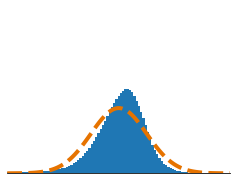

5.5183802765972
149.39267268396412


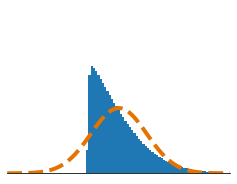

0.14333951574986875
-0.39720689389772845


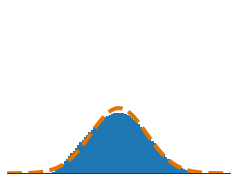

-1.5768979736202833
5.097394620429759


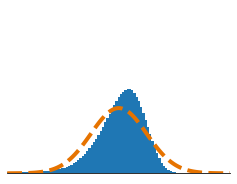

6.440375560139662
145.08279707705847


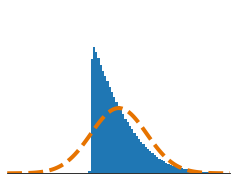

0.28904583756029917
0.31998294990805976


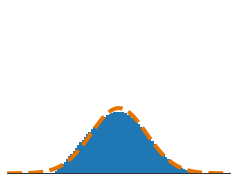

-1.5300068912297922
4.8185533170088535


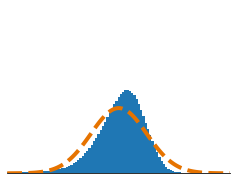

5.238093341857927
127.41660765983062


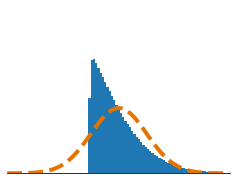

0.17258008099763664
-0.3282151166999192


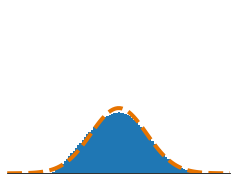

-0.2696895906442447
0.34266631724182073


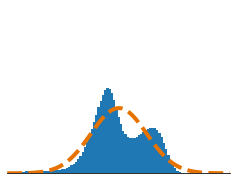

5.220396280687107
109.82768656442508


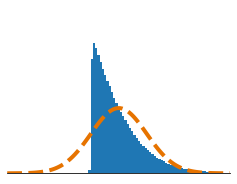

0.4938117737741711
0.04483640885523199


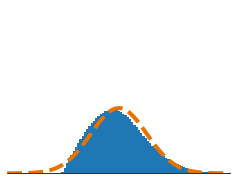

0.2300227654655354
-0.6919576746392502


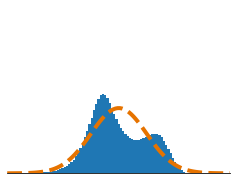

5.3029213955954315
127.75771370498467


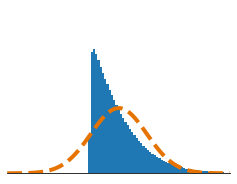

0.4747645124301345
0.013731371005596849


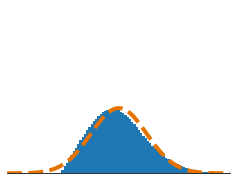

0.03531013095908323
1.970653695592743


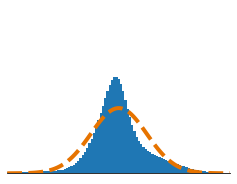

5.749504279488654
102.14225616550924


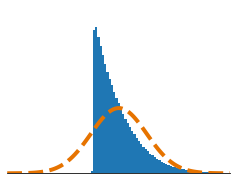

0.5422789638169511
0.5180754614656542


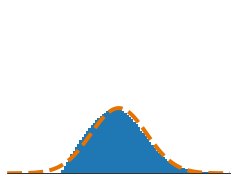

0.03531013095908323
1.970653695592743


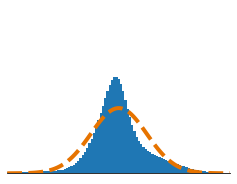

5.749504279488654
102.14225616550924


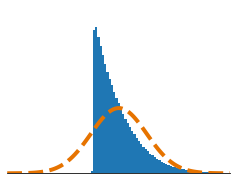

0.5422789638169511
0.5180754614656542


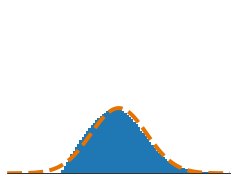

0.20643788189532317
0.5318823588324229


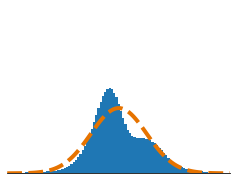

5.0887652869219355
112.37620676322769


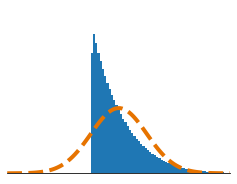

0.5050077919305805
0.21631270018233906


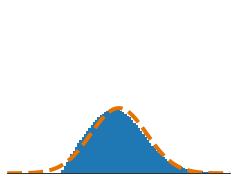

-0.57555098369736
2.4529265553344652


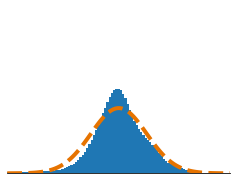

6.145592105962331
142.82126730603986


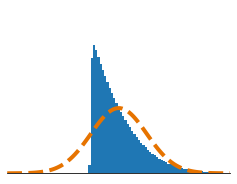

0.41339450298807123
0.09095854155259575


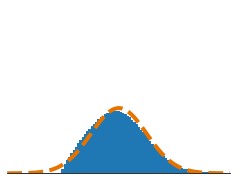

-0.05059707483569142
0.6364289673719292


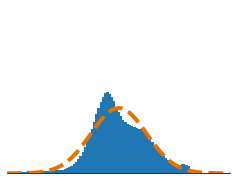

4.692166963319268
107.03869593669448


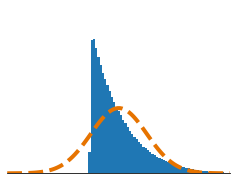

0.713310916944046
0.5647733948456284


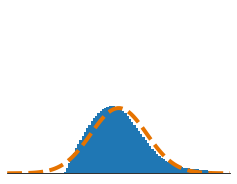

-0.13568356103215704
0.6126728383235278


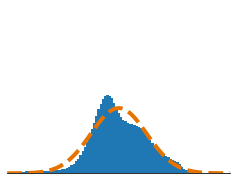

5.4632330512059095
135.6802241718506


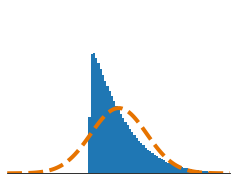

0.5391471484959438
0.16933813512849571


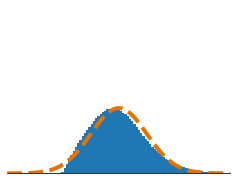

0.04220039109424713
0.029721391367937056


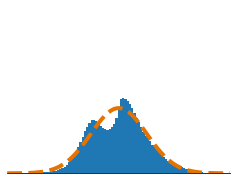

7.158536811733342
91.76911565617593


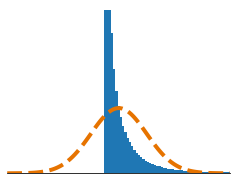

1.125676623044973
2.2024605770792975


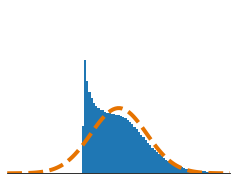

-1.1272079487310542
3.978643984634604


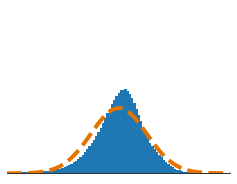

5.538410060035028
129.4678968414604


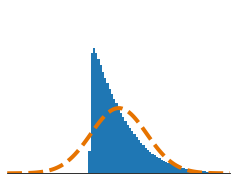

0.2828160186062198
-0.1876939119303178


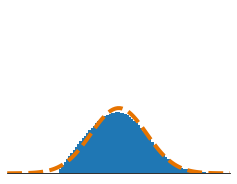

-1.0086645084023855
2.7291536320413643


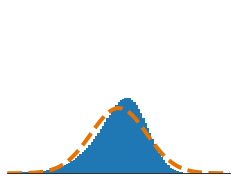

5.445403521973321
121.77700784036328


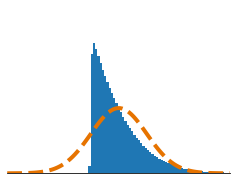

0.22951716051975188
-0.21976971064340978


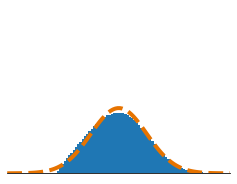

0.4205781477982508
1.2578604591716207


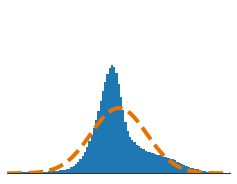

6.054903069323954
99.57806601603056


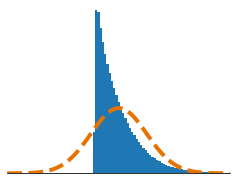

0.6852315084795935
0.7630367603780304


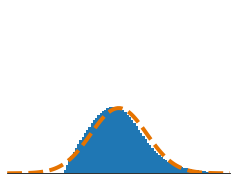

In [22]:
for file_id in range(n_files):
    file_ids = [file_id]
    log_E_ravel = np.concatenate([log_list[i] for i in file_ids])
    indoor_PCEN_ravel = np.concatenate([indoor_list[i] for i in file_ids])
    outdoor_PCEN_ravel = np.concatenate([outdoor_list[i] for i in file_ids])
    
    wav_path = wav_paths[file_id]
    wav_name = os.path.split(wav_path)[1][:-4]

    figsize = (4, 3)
    fig = plt.figure(figsize=figsize)
    xgauss = np.linspace(-4, 4, 100)
    hist_x = plt.hist(
        (log_E_ravel - np.mean(log_E_ravel)) / np.std(log_E_ravel),
        bins=xgauss);
    hist_step = np.diff(hist_x[1])[0]
    gaussmax = len(log_E_ravel)/np.sqrt(2*np.pi) * hist_step
    ygauss = gaussmax * np.exp(-(xgauss*xgauss)/2)
    plt.plot(xgauss, ygauss, '--', color="#E67300", linewidth=4.0)
    plt.xlim([-4,4])
    plt.ylim([0, 2.5*gaussmax])
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(labelleft="off", left="off")
    print(scipy.stats.skew(log_E_ravel))
    print(scipy.stats.kurtosis(log_E_ravel))
    plt.gca().axes.get_xaxis().set_visible(False)
    fig.savefig(subfolder_str + "_" + wav_name + '_logE_histogram.eps',
        transparent=True, bbox_inches="tight")
    plt.show()


    fig = plt.figure(figsize=figsize, frameon=False)
    plt.hist((indoor_PCEN_ravel - np.mean(indoor_PCEN_ravel)) / np.std(indoor_PCEN_ravel), bins=xgauss);
    plt.plot(xgauss, ygauss, '--', color="#E67300", linewidth=4.0)
    plt.xlim([-4,4])
    plt.ylim([0, 2.5*gaussmax])
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(labelleft="off", left="off")
    print(scipy.stats.skew(indoor_PCEN_ravel))
    print(scipy.stats.kurtosis(indoor_PCEN_ravel))
    plt.gca().axes.get_xaxis().set_visible(False)
    fig.savefig(subfolder_str + "_" + wav_name + '_indoor-PCEN_histogram.eps',
        transparent=True, bbox_inches="tight")
    plt.show()


    fig = plt.figure(figsize=figsize, frameon=False)
    plt.hist((outdoor_PCEN_ravel - np.mean(outdoor_PCEN_ravel)) / np.std(outdoor_PCEN_ravel), bins=xgauss);
    plt.plot(xgauss, ygauss, '--', color="#E67300", linewidth=4.0)
    plt.xlim([-4,4])
    plt.ylim([0, 2.5*gaussmax])
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(labelleft="off", left="off")
    print(scipy.stats.skew(outdoor_PCEN_ravel))
    print(scipy.stats.kurtosis(outdoor_PCEN_ravel))
    plt.gca().axes.get_xaxis().set_visible(False)
    fig.savefig(subfolder_str + "_" + wav_name + '_outdoor-PCEN_histogram.eps',
        transparent=True, bbox_inches="tight")
    plt.show()

In [65]:
log_hists = []
indoor_hists = []
outdoor_hists = []

all_log_E_ravel = np.concatenate(log_list)
all_indoor_ravel = np.concatenate(indoor_list)
all_outdoor_ravel = np.concatenate(outdoor_list)

for file_id in tqdm.tqdm(range(n_files)):
    file_ids = [file_id]
    log_E_ravel = np.concatenate([log_list[i] for i in file_ids])
    indoor_PCEN_ravel = np.concatenate([indoor_list[i] for i in file_ids])
    outdoor_PCEN_ravel = np.concatenate([outdoor_list[i] for i in file_ids])
    
    wav_path = wav_paths[file_id]
    wav_name = os.path.split(wav_path)[1][:-4]

    xgauss = np.linspace(-4, 4, 100)
    hist_x = np.histogram(
        (log_E_ravel - np.mean(all_log_E_ravel)) / np.std(all_log_E_ravel),
        bins=xgauss)[0];
    log_hists.append(hist_x)

    hist_x = np.histogram(
        (indoor_PCEN_ravel - np.mean(all_indoor_ravel)) / np.std(all_indoor_ravel),
        bins=xgauss)[0];
    indoor_hists.append(hist_x)
    
    hist_x = np.histogram(
    (outdoor_PCEN_ravel - np.mean(all_outdoor_ravel)) / np.std(all_outdoor_ravel),
    bins=xgauss)[0];
    outdoor_hists.append(hist_x)

100%|██████████| 15/15 [00:39<00:00,  2.63s/it]


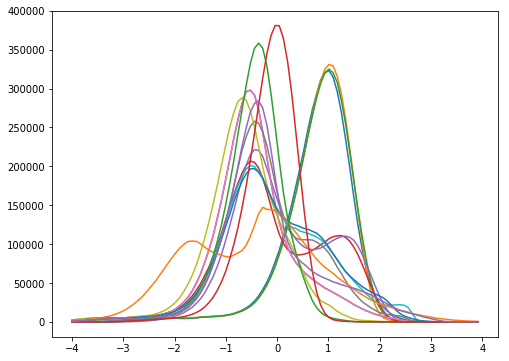

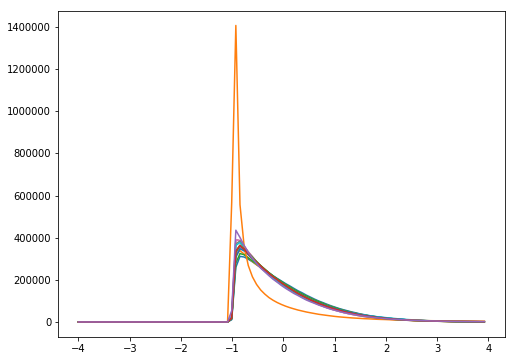

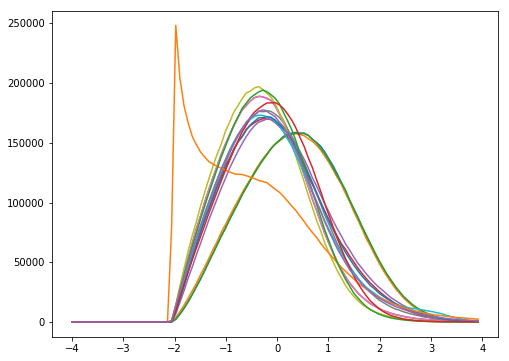

In [67]:
figsize = (8, 6)

for tfr_hist in [log_hists, indoor_hists, outdoor_hists]:
    plt.figure(figsize=figsize)
    plt.plot(xgauss[:-1], np.stack(tfr_hist).T);
    plt.show();

In [69]:
wav_names[6]

'/beegfs/vl1019/spl2018_datasets/BirdVox-pcen/unit10_07-54-24.wav'

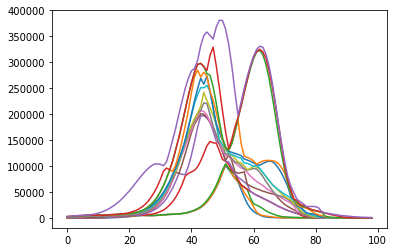

In [55]:
plt.plot(np.percentile(np.stack(log_hists).T, q=np.linspace(0, 100, 15), axis=1).T);

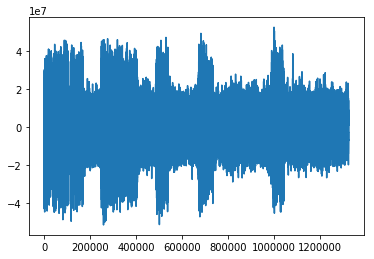

In [74]:
wav_path = wav_paths[7]
waveform_file = sf.SoundFile(wav_path)
waveform_length = len(waveform_file)
sample_rate = waveform_file.samplerate
waveform_file.seek(0)
waveform = waveform_file.read(waveform_length)
waveform = librosa.resample(
    waveform, sample_rate, outdoor_settings["sr"])
waveform = waveform * (2**31)
plt.plot(waveform)

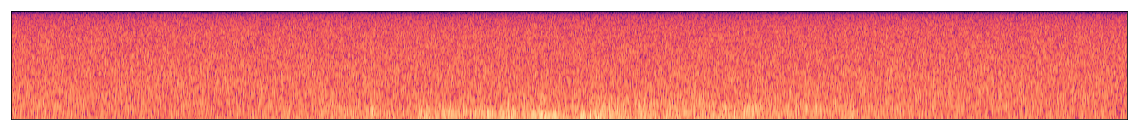

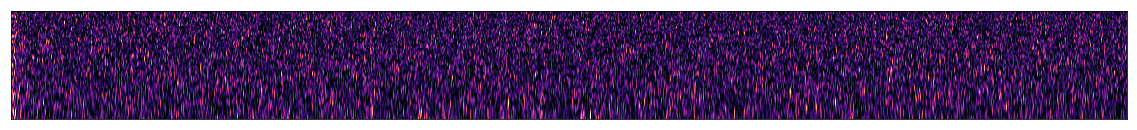

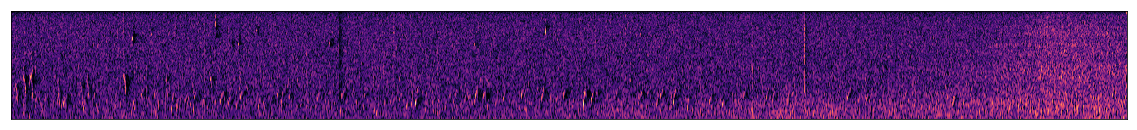

In [27]:
plt.figure(figsize=(20,2))
specshow(np.log(outdoor_E))
plt.show()

plt.figure(figsize=(20,2))
specshow(np.clip(indoor_PCEN, 0, 3))
plt.show()

plt.figure(figsize=(20,2))
specshow(outdoor_PCEN)
plt.show()

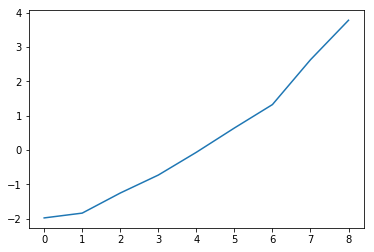

In [13]:
plt.plot(np.percentile((outdoor_PCEN_ravel - np.mean(outdoor_PCEN_ravel)) / np.std(outdoor_PCEN_ravel), [0.1, 1, 10, 25, 50, 75, 90, 99, 99.9]))

In [20]:

wav_name

'unit10_07-54-24'